# Проект: Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

### **Оглавление**
<a class="anchor" id="chapter0"></a>
* [Описание данных](#chapter0)
* [Шаг 1. Загрузка данных](#chapter1)
* [Шаг 2. Предобработка данных](#chapter2)
* [Шаг 3. Исследовательский анализ данных](#chapter3)
    * [3.1 Частота встречаемости городов](#chapter31)
    * [3.2 Соотношение пользователей с подпиской и без подписки](#chapter32)
    * [3.3 Возраст пользователей](#chapter33)
    * [3.4 Расстояние, которое пользователь преодолел за одну поездку](#chapter34)
    * [3.5 Продолжительность поездок](#chapter35)
* [Шаг 4. Объединение данных](#chapter4)
    * [4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. ](#chapter41)
    * [4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1](#chapter42)
    * [4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.](#chapter43)
* [Шаг 5. Подсчёт выручки](#chapter5)
* [Шаг 6. Проверка гипотез](#chapter6)
    * [6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? ](#chapter61)
    * [6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.](#chapter62)
    * [6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. ](#chapter63)
    * [6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение.](#chapter64)
* [Вывод](#chapter7)

## Описание данных
<a class="anchor" id="chapter0"></a>

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи — users_go.csv**

- `user_id` —	уникальный идентификатор пользователя
- `name` —	имя пользователя
- `age` —	возраст
- `city` —	город
- `subscription_type` —	тип подписки (free, ultra)

**Поездки — rides_go.csv**

- `user_id` —	уникальный идентификатор пользователя
- `distance` —	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` —	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` —	дата совершения поездки

**Подписки — subscriptions_go.csv**

- `subscription_type` —	тип подписки
- `minute_price` —	стоимость одной минуты поездки по данной подписке
- `start_ride_price` —	стоимость начала поездки
- `subscription_fee` —	стоимость ежемесячного платежа

In [52]:
from scipy import stats as st
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set (font_scale=1.1)
#sns.set (font_scale=1)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Image

from IPython.display import display

# фреймворк ICE 
pd.set_option('display.max_colwidth', 500)

## general options
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',62)
#pd.set_option("precision", 3)

## for text columns
#pd.set_option('display.max_colwidth',500)

## Шаг 1. Загрузка данных
<a class="anchor" id="chapter1"></a>

In [2]:
try:
    rides_go = pd.read_csv('/datasets/rides_go.csv', sep=',')
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
    users_go = pd.read_csv('/datasets/users_go.csv', sep=',')
except:
    rides_go = pd.read_csv('C:/Users/nesku/Проекты_учебные/Статистика/rides_go.csv', sep=',')
    subscriptions_go = pd.read_csv('C:/Users/nesku/Проекты_учебные/Статистика/subscriptions_go.csv', sep=',') 
    users_go = pd.read_csv('C:/Users/nesku/Проекты_учебные/Статистика/users_go.csv', sep=',')

In [3]:
rides_go.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
subscriptions_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [5]:
users_go.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


**Предварительный вывод**
    
Каких то аномальных или нестандартных отклонений в данных на данном этапе не обнаружено. Далее проверим данные на пропуски, дубликаты и неверный формат.

## Шаг 2. Предобработка данных
<a class="anchor" id="chapter2"></a>

[*в начало*](#chapter0)

In [6]:
#rides_go.info()
#users_go.info()

В строках обоих датафреймов пропуски отсутствуют

In [7]:
# date — дата совершения поездки, форматируем в дату без времени + создаем столбец с месяцем
#2018-12-12T12:00:00.000Z
rides_go['date'] = pd.to_datetime(rides_go['date'], format ='%Y-%m-%d').dt.date

In [8]:
# создадим доп.столбец с месяцем
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month

In [9]:
#rides_go.duplicated().sum() # полных дублирующихся записей нет
users_go.duplicated().sum() # полных дублирующихся записей 31

31

In [10]:
# отобразим дубликаты
users_go.sort_values(by=['user_id'], ascending = True)[users_go.duplicated(keep = False)] 

,user_id,name,age,city,subscription_type
1535,16,Амалия,27,Краснодар,ultra
15,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
46,47,Юрий,28,Тюмень,ultra
71,72,Никита,25,Москва,ultra
1555,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
1549,108,Влада,29,Тюмень,ultra


In [11]:
# удалим дубликаты
users_go = users_go.drop_duplicates()

Из датафрейма users_go удалены 31 дублирующихся строк

Провели первичный анализ и познакомились с данными. Приступим к исследовательскому анализу.

In [12]:
#rides_go['date'].describe()
rides_go['date'].min()

datetime.date(2021, 1, 1)

In [13]:
rides_go['date'].max()

datetime.date(2021, 12, 30)

In [14]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Данные в пределах одного года и аномальные значения в данных не обнаружены. Сессии длиной в 0.5 минуты - вполне допускаю, что пользователь мог на 30 секунд включить сервис или 30 секунд им воспользоваться.

## Шаг 3. Исследовательский анализ данных
<a class="anchor" id="chapter3"></a>

Опишем и визуализируем общую информацию о пользователях и поездках:
1. частота встречаемости городов;
1. соотношение пользователей с подпиской и без подписки;
1. возраст пользователей;
1. расстояние, которое пользователь преодолел за одну поездку;
1. продолжительность поездок.

### 3.1 Частота встречаемости городов
<a class="anchor" id="chapter31"></a>
**Пользователи — users_go.csv**
- `city` —	город

[*в начало*](#chapter0)

In [15]:
users_go['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

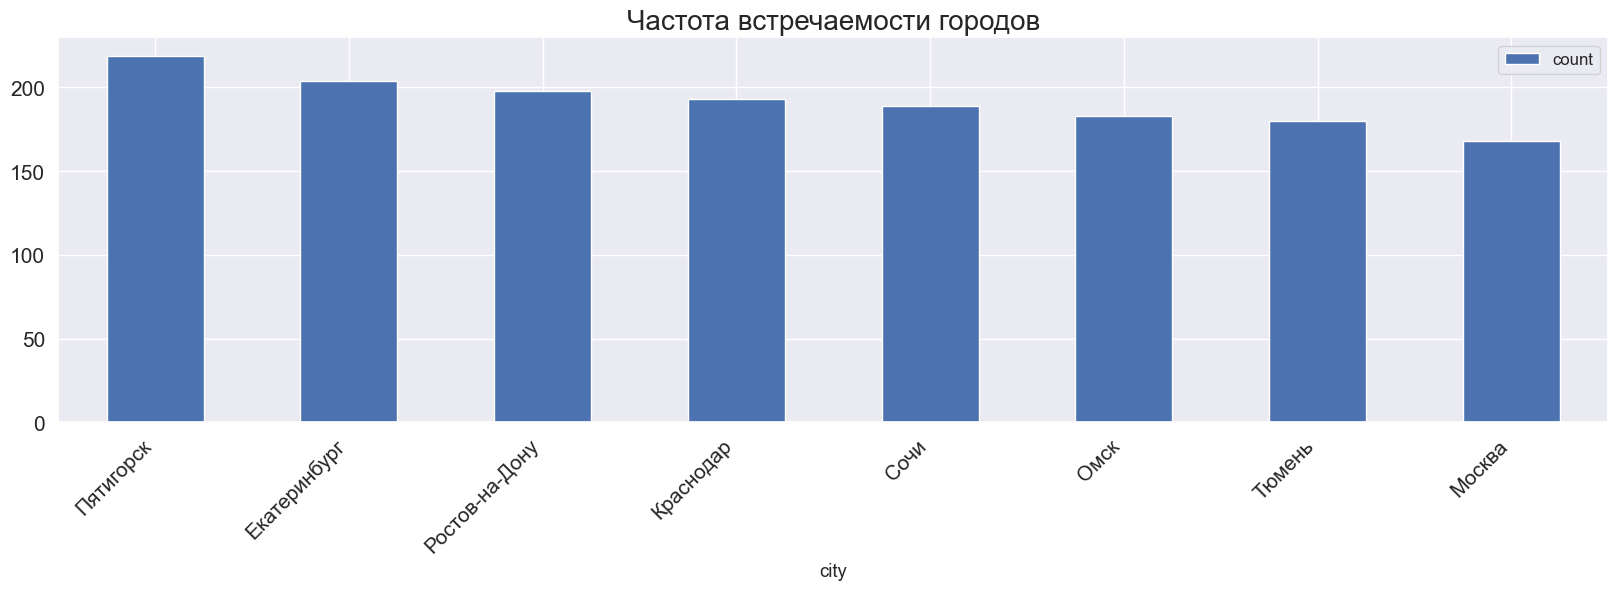

In [16]:
users_go[['city']].value_counts().reset_index().plot(x='city', kind='bar', figsize=(20, 5));
plt.xticks(rotation=45, horizontalalignment='right', fontsize=15)
plt.yticks(rotation=0, horizontalalignment='right', fontsize=15)
plt.title('Частота встречаемости городов', fontdict={'size':20})
plt.legend(['count']);

**Диаграмма с сортировкой по убыванию частоты встречаемости городов**

По числу клиентов состав приблизительно одинаковый, колеблется в пределах от 219 в Пятигорске до 168 из Москвы.

### 3.2 Соотношение пользователей с подпиской и без подписки
**Пользователи — users_go.csv**
- `subscription_type` —	тип подписки (free, ultra)

<a class="anchor" id="chapter32"></a>

[*в начало*](#chapter0)

In [17]:
table = users_go[['subscription_type']].value_counts().reset_index()
table.columns = ['subscription_type', 'count']
table

,subscription_type,count
0,free,835
1,ultra,699


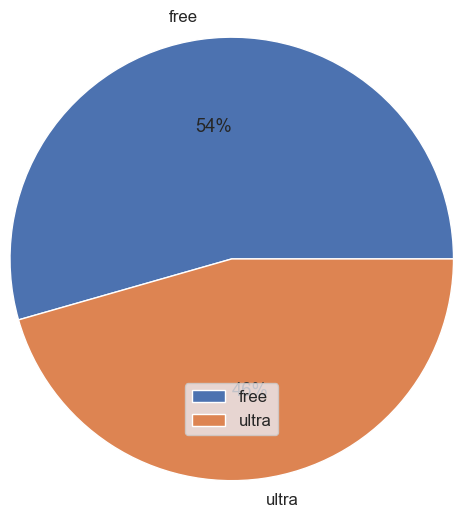

In [19]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

table = users_go[['subscription_type']].value_counts(normalize=True).reset_index()
table.columns = ['subscription_type', 'percentage']
table.plot(kind='pie', y='percentage', autopct='%1.0f%%',radius=1.5, labels=['free','ultra']);#, pctdistance=0.5);
#plt.title('соотношение пользователей с подпиской и без подписки', fontdict={'size':20})
#plt.legend(['free','ultra']);

**Круговая диаграмма соотношения пользователей с подпиской и без**

По численному соотношению в выборке, пользователей приблизительно одинаковое количество

### 3.3 Возраст пользователей
**Пользователи — users_go.csv**
- `age` —	возраст

<a class="anchor" id="chapter33"></a>

[*в начало*](#chapter0)

In [20]:
table = users_go[['age']].value_counts().reset_index()
table.columns = ['age', 'count']
table

,age,count
0,25,145
1,24,132
2,26,131
3,23,129
4,27,119
5,22,119
6,28,112
7,21,93
8,20,71
9,30,68


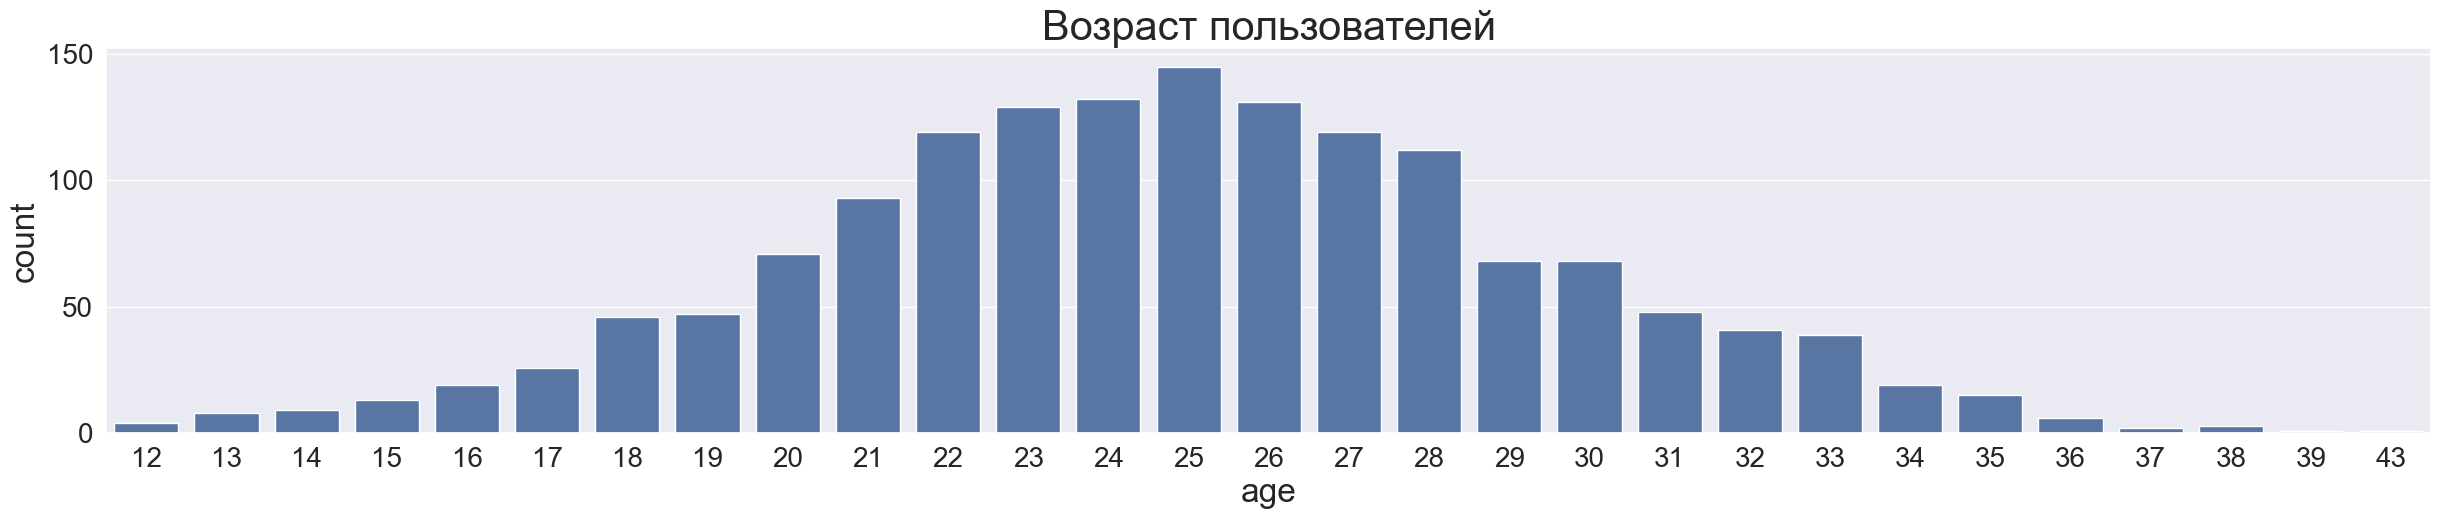

In [22]:
f, ax = plt.subplots(figsize=(30, 5))
sns.set(font_scale=2)
plt.xticks(rotation=0, fontsize=20, fontweight='light') #fontweight='light', rotation_mode="anchor", horizontalalignment='right',
plt.yticks(rotation=0, horizontalalignment='right', fontsize=20)
plt.title('Возраст пользователей', fontdict={'size':30})
sns.barplot(data=table, x="age", y="count")

# show the graph
plt.show()

**Диаграмма распределения возраста пользователей**

Возраст клиентов распределен нормально вокруг среднего в 25 лет и колеблется в пределах от 12 до 43. Основная масса клиентов в возрасте от 18 до 33 лет.

### 3.4 Расстояние, которое пользователь преодолел за одну поездку

**Поездки — rides_go.csv**
- `distance` —	расстояние, которое пользователь проехал в текущей сессии (в метрах)

<a class="anchor" id="chapter34"></a>

[*в начало*](#chapter0)

In [24]:
#rides_go[['distance']].value_counts().reset_index()
rides_go['distance_km'] = round((rides_go['distance']/1000),2)#.astype('int')
table = rides_go[['distance_km']].value_counts().reset_index()
table.columns = ['distance_km', 'count']
table

,distance_km,count
0,3.15,109
1,3.16,104
2,3.06,98
3,3.05,96
4,3.02,95
...,...,...
624,6.07,1
625,6.08,1
626,6.10,1
627,6.12,1


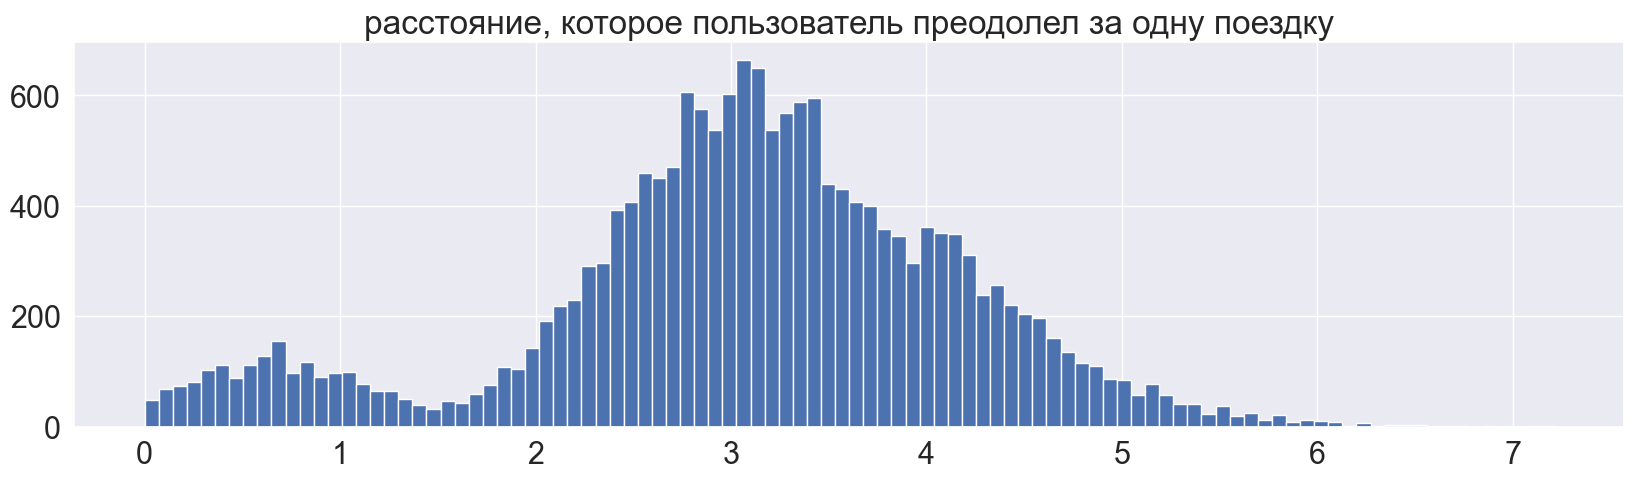

In [25]:
rides_go['distance_km'].hist(figsize=(20, 5), bins = 100);#, range=(6, 8))
plt.title('расстояние, которое пользователь преодолел за одну поездку', loc='center');

#### Вывод

В представленной выборке видно, что часть клиентов могла воспользоваться сервисом для преодоления короткого расстояния, часть на длинное расстояние.
Представленную выборку можно поделить на две части, на часть где пользователи пользуются сервисом для преодоления небольшого расстояния в пределах 1км, и на часть где пользователи используют самокаты на длинное расстояние от 2 до 5км.

### 3.5 Продолжительность поездок
**Поездки — rides_go.csv**
- `duration` —	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку

<a class="anchor" id="chapter35"></a>

[*в начало*](#chapter0)

In [26]:
rides_go['duration_m'] = round(rides_go['duration'],1)#.astype('int')
table = rides_go[['duration_m']].value_counts().reset_index()
table.columns = ['duration_m', 'count']
table

,duration_m,count
0,18.3,141
1,17.3,139
2,16.0,136
3,20.1,135
4,18.6,132
...,...,...
346,35.4,1
347,35.3,1
348,35.1,1
349,2.1,1


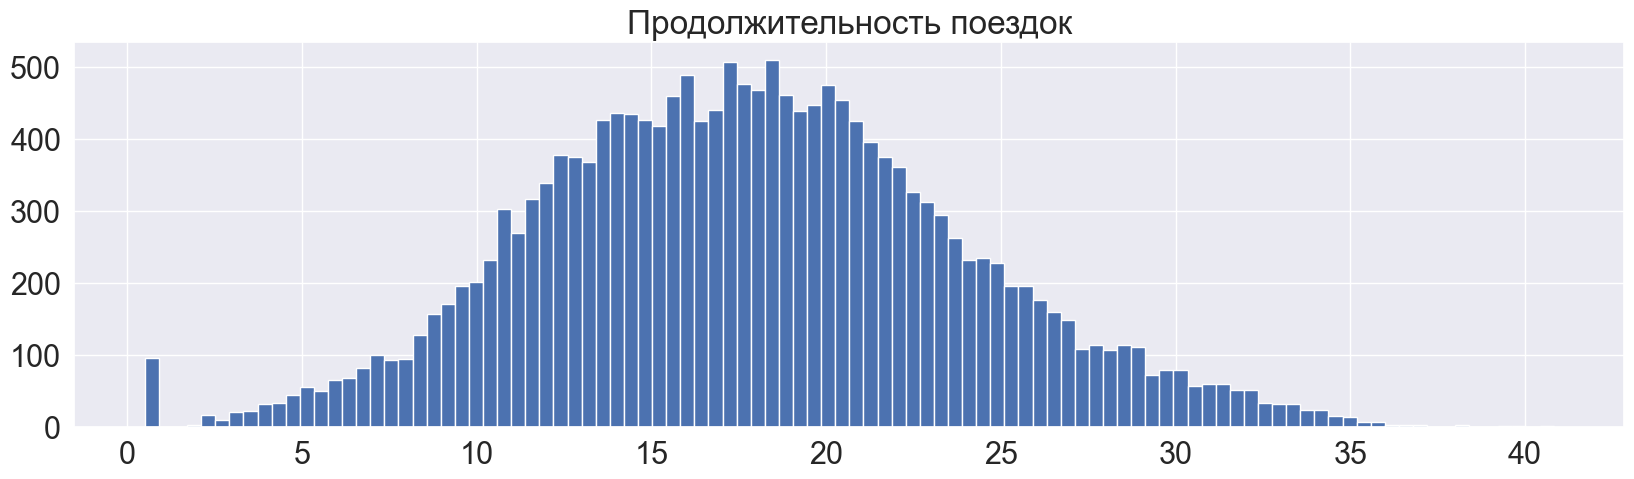

In [27]:
rides_go['duration'].hist(figsize=(20, 5), bins = 100);#, range=(6, 8))
plt.title('Продолжительность поездок', loc='center');

In [46]:
rides_go['duration_m'] =  np.ceil(rides_go['duration']).astype('int')
table = rides_go[['duration_m']].value_counts().reset_index()
table.columns = ['duration_m', 'count']
#table

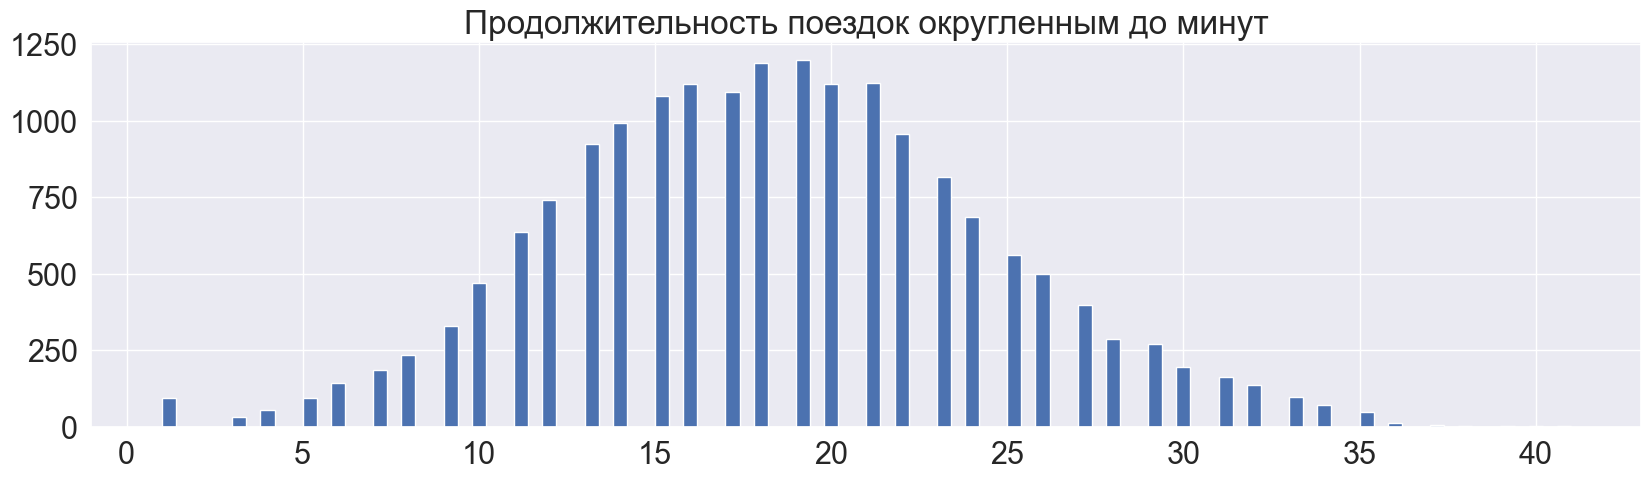

In [47]:
rides_go['duration_m'].hist(figsize=(20, 5), bins = 100);#, range=(6, 8))
plt.title('Продолжительность поездок округленным до минут', loc='center');

In [49]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Заметно, что часть пользователей пользовалась сервисом менее одно минуты.

## 5 Шаг. Объединение данных
<a class="anchor" id="chapter4"></a>

### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. 
С помощью метода merge().
<a class="anchor" id="chapter41"></a>

[*в начало*](#chapter0)

In [31]:
#smbio_1=smbio.merge(terminal_sn, how='outer', left_on=['device_num'], right_on=['device_num'])
df=rides_go.merge(users_go, how='left', on=['user_id'])

In [32]:
df=df.merge(subscriptions_go, how='left', on=['subscription_type'])

In [33]:
df.sample(5)

,user_id,distance,duration,date,month,distance_km,duration_m,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
11241,1047,2895.636557,14.858637,2021-06-17,6,2.90,15,Дмитрий,23,Сочи,free,8,50,0
755,83,1589.051469,16.296838,2021-05-17,5,1.59,16,Ксения,23,Омск,ultra,6,0,199
13589,1216,4236.954022,22.079187,2021-12-27,12,4.24,22,Элина,20,Тюмень,free,8,50,0
14480,1278,4327.983026,18.983949,2021-07-14,7,4.33,19,Дмитрий,24,Краснодар,free,8,50,0
5522,588,4455.193637,22.900430,2021-10-08,10,4.46,23,Маргарита,24,Москва,ultra,6,0,199


In [34]:
# проверка на дубли после объединения.
#df.duplicated().sum() # полных дублирующихся записей нет
df.info() #данные объединенны корректно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            18068 non-null  int64  
 1   distance           18068 non-null  float64
 2   duration           18068 non-null  float64
 3   date               18068 non-null  object 
 4   month              18068 non-null  int32  
 5   distance_km        18068 non-null  float64
 6   duration_m         18068 non-null  int32  
 7   name               18068 non-null  object 
 8   age                18068 non-null  int64  
 9   city               18068 non-null  object 
 10  subscription_type  18068 non-null  object 
 11  minute_price       18068 non-null  int64  
 12  start_ride_price   18068 non-null  int64  
 13  subscription_fee   18068 non-null  int64  
dtypes: float64(3), int32(2), int64(5), object(4)
memory usage: 1.8+ MB


In [35]:
rides_go.shape

(18068, 7)

In [36]:
users_go.shape

(1534, 5)

In [37]:
subscriptions_go.shape

(2, 4)

In [38]:
df.shape

(18068, 14)

Размерность объединенного датасета не нарушена, после сращивания строк стало ровно столько, сколько было в датасете с действиями клиентов rides_go - 18068 строк. Пропуски в данных также отстутсвуют, видно из проверки выше df.info(). В каждом поле 18068 значений.

### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- **df_free** c данными о пользователях без подписки;
- **df_ultra** с данными о пользователях с подпиской.

<a class="anchor" id="chapter42"></a>

[*в начало*](#chapter0)

In [55]:
df_free = df.query('subscription_type == "free"')

In [56]:
df_ultra = df.query('subscription_type == "ultra"')

In [57]:
#df_free['subscription_type'].value_counts()
#df_ultra['subscription_type'].value_counts()

### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.
<a class="anchor" id="chapter43"></a>

[*в начало*](#chapter0)

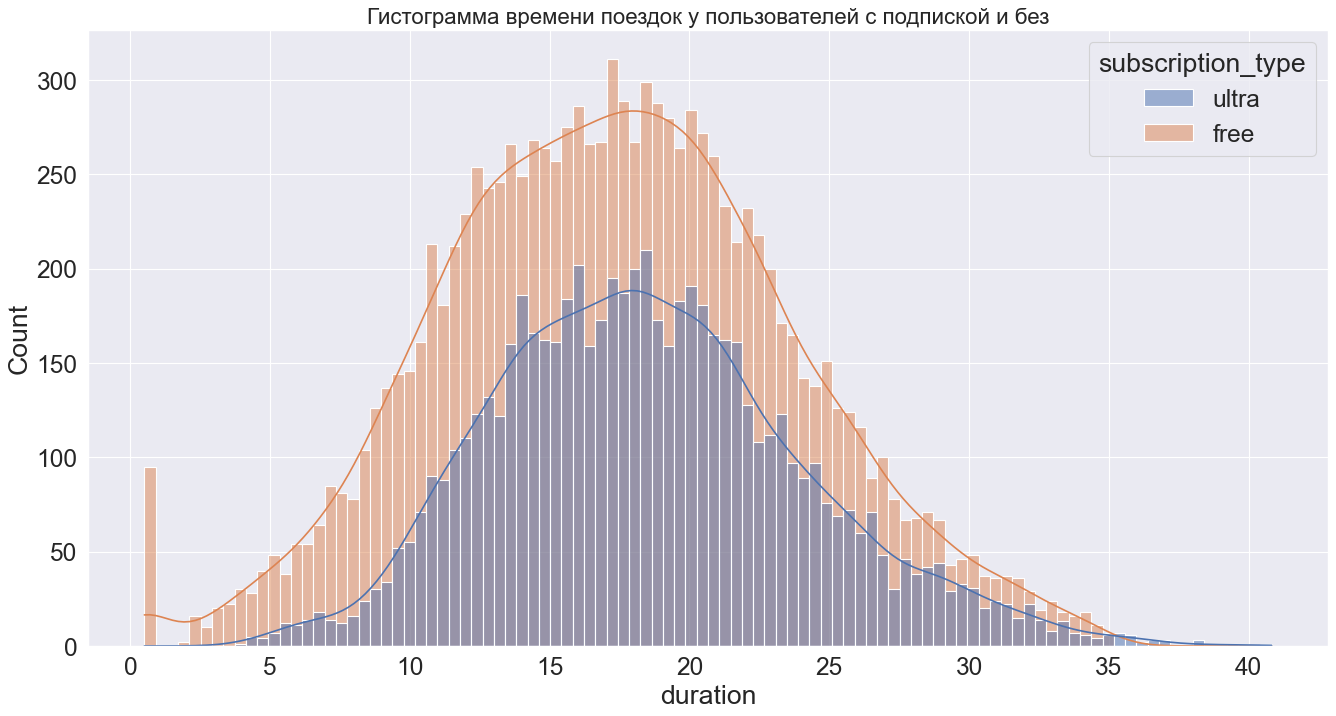

In [42]:
plt.figure(figsize=(20,10), dpi = 80)
#sns.displot(data=table, x="duration_m", hue="subscription_type", y="count");
sns.histplot(data=df, x="duration", hue="subscription_type", kde=True, bins=100)#, multiple='stack')
plt.title('Гистограмма времени поездок у пользователей с подпиской и без', fontsize=20)
plt.show();

Клиенты без подписки чаще пользуются сервисом на короткое время. Скорее всего это спонтанные/незапланированные поездки

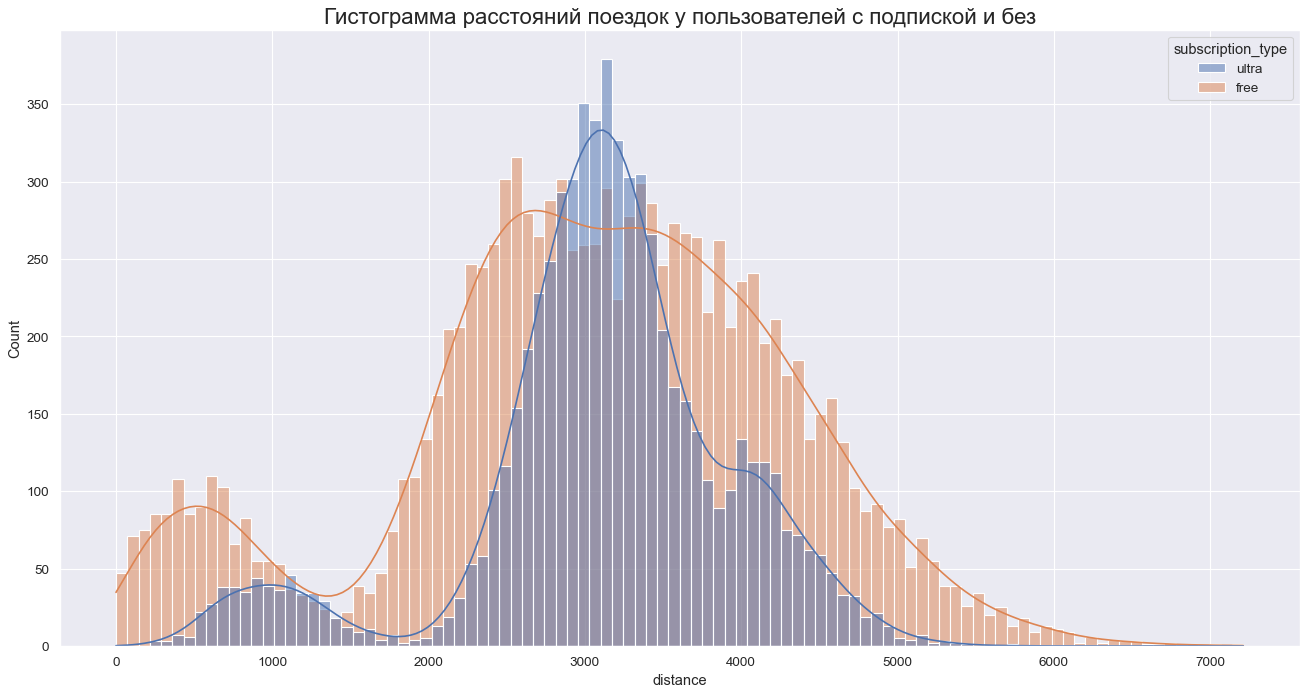

In [58]:
plt.figure(figsize=(20,10), dpi = 80)
#sns.displot(data=table, x="duration_m", hue="subscription_type", y="count");
sns.histplot(data=df, x="distance", hue="subscription_type", kde=True, bins=100)#, multiple='stack')
plt.title('Гистограмма расстояний поездок у пользователей с подпиской и без', fontsize=20)
plt.show();

Клиенты без подписки часто проезжают не больше 1000 метров и могут прервать поездку в самом начале.

## Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках 
на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

<a class="anchor" id="chapter5"></a>

[*в начало*](#chapter0)

In [59]:
# сводная таблица количества поездок и суммарного расстояния по каждому клиенту агрегированные по месяцам
df_distance = df.pivot_table(index=['user_id', 'month'], 
                                    values='distance', aggfunc=('sum','count')).reset_index()
df_distance = df_distance.rename(columns = {'sum': 'sum_distance','count': 'count_ride'})

In [60]:
# сводная таблица суммарного времени затраченного на поездки по каждому клиенту по месяцам
df_duration = df.pivot_table(index=['user_id', 'month'], 
                                    values='duration', aggfunc=('sum')).reset_index()
df_duration = df_duration.rename(columns = {'sum': 'sum_duration'})

In [61]:
df_agg = df_distance.merge(df_duration, on=['user_id','month'], how='left')


5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа: например, значения 25.3, 25.5 и 26.0 будут преобразованы к 26.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

In [44]:
# Округление до целого в большую сторону
df['duration_ceil'] = df['duration'].apply(np.ceil).astype('int')

In [45]:
# сводная таблица суммарного округленного времени затраченного на поездки по каждому клиенту по месяцам
df_duration = df.pivot_table(index=['user_id', 'month', 'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type'], 
                                    values='duration_ceil', aggfunc=('sum')).reset_index()
df_duration = df_duration.rename(columns = {'sum': 'sum_duration_ceil'})

In [46]:
df_agg = df_agg.merge(df_duration, on=['user_id','month'], how='left')

In [47]:
# Расчет оплаты для всех пользователей
df_agg['payment'] = (df_agg['minute_price'] * df_agg['duration_ceil'] + df_agg['start_ride_price'] * 
                     df_agg['count_ride'] + df_agg['subscription_fee'])

In [48]:
# Удаляем поля с детализацией подписки
df_agg = df_agg.drop(columns=['minute_price','start_ride_price', 'subscription_fee'], axis=1)

In [49]:
df_agg.sample(10)

,user_id,month,count_ride,sum_distance,duration,subscription_type,duration_ceil,payment
6147,904,5,1,2594.213785,26.150257,free,27,266
2074,317,3,2,7125.385698,40.501394,ultra,42,451
1141,175,9,3,10560.743712,57.610938,ultra,59,553
5410,811,8,1,4646.583377,26.939750,free,27,266
7485,1066,4,3,8127.583766,51.186437,free,53,574
3778,578,9,2,6587.079284,39.059718,ultra,40,439
397,63,9,1,4195.345919,31.976730,ultra,32,391
4339,669,1,2,5634.683916,41.577256,ultra,43,457
4581,705,9,2,7031.024399,32.356994,free,34,372
11180,1518,1,1,1965.382492,18.716918,free,19,202


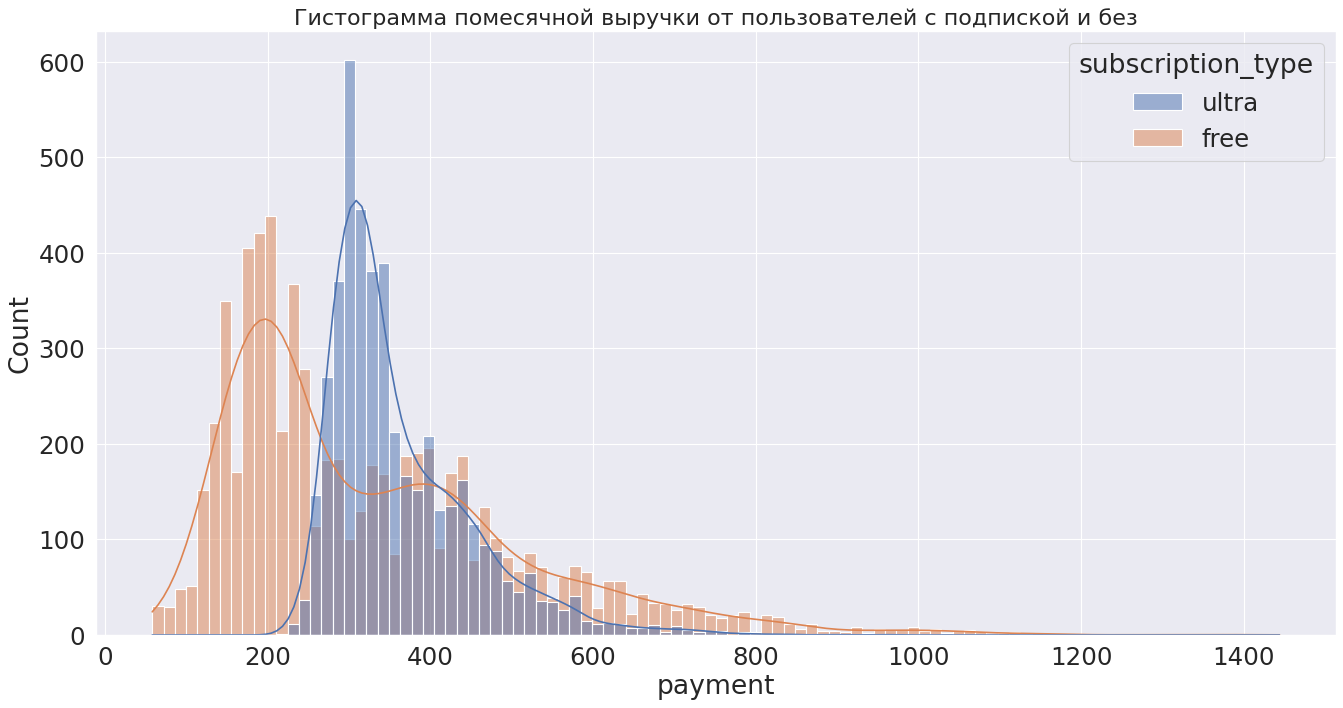

In [50]:
plt.figure(figsize=(20,10), dpi = 80)
#sns.displot(data=table, x="duration_m", hue="subscription_type", y="count");
sns.histplot(data=df_agg, x="payment", hue="subscription_type", kde=True, bins=100)#, multiple='stack')
plt.title('Гистограмма помесячной выручки от пользователей с подпиской и без', fontsize=20)
plt.show();

## Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.
3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
Сделаем вывод.
4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Определим подходящий тест для проверки этой гипотезы.

<a class="anchor" id="chapter6"></a>

[*в начало*](#chapter0)


### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

-------------------
В качестве решения проверим гипотезу "О равенстве средних двух генеральных совокупностей для двух независимых выборок".

**Нулевая гипотеза** предполагает, что средние двух генеральных совокупностей равны.
- H0: μ1 = μ2

**Альтернативная гипотеза** - что у пользователей с подпиской среднее больше. (Правосторонняя альтернативная гипотеза)
- H1: μ1 > μ2

где:
- μ1 — среднее значение времени сесии пользователей с подпиской
- μ2 — среднее значение времени сесии пользователей без подписки

Нужно провести двухвыборочный t-тест для независимых выборок методом scipy.stats.ttest_ind

- df_free генеральная совокупность c данными о пользователях без подписки;
- df_ultra генеральная совокупность с данными о пользователях с подпиской.

<a class="anchor" id="chapter61"></a>

[*в начало*](#chapter0)

In [51]:
# время сессий подписчиков
#time_ultra = round(df.query('subscription_type =="ultra"')['duration'],1)
time_ultra = df_ultra['duration'].sample(3000)
# время сессий клиентов без подписки
#time_free = round(df.query('subscription_type =="free"')['duration'],1)
time_free = df_free['duration'].sample(3000)

print(f'Среднее время клиентов с подпиской: {np.mean(time_ultra)}')
print(f'Среднее время клиентов без подписки: {np.mean(time_free)}')

alpha = 0.05 # уровень стат. значимости

results = st.ttest_ind(time_ultra, time_free, alternative='greater') # less

# вывод на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравнение p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее время клиентов с подпиской: 18.46530840256197
Среднее время клиентов без подписки: 17.302646140899085
p-значение: 2.194352826653804e-14
Отвергаем нулевую гипотезу


Размер датафреймов позволяет провести t-тест на обоих генеральных совокупностях без выборок. Результат тот же ,только зачения не меняются.

In [52]:
# время сессий подписчиков
#time_ultra = round(df.query('subscription_type =="ultra"')['duration'],1)
time_ultra = df_ultra['duration']
# время сессий клиентов без подписки
#time_free = round(df.query('subscription_type =="free"')['duration'],1)
time_free = df_free['duration']

print(f'Среднее время клиентов с подпиской: {np.mean(time_ultra)}')
print(f'Среднее время клиентов без подписки: {np.mean(time_free)}')

alpha = 0.05 # уровень стат. значимости

results = st.ttest_ind(time_ultra, time_free, alternative='greater') # less

# вывод на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравнение p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее время клиентов с подпиской: 18.54198516280583
Среднее время клиентов без подписки: 17.39090929866399
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


#### Вывод: 
Значение p-value намного ниже порога статистической значимости, вероятность получить среднее время пользователей с подпиской равное среднему времени пользователей без подписки - очень мала. Нулевая гипотеза отвергнута в пользу альтернативной, **H1: μ1 > μ2**. Значит продакт-менеджеры сервиса в части предположения о большей длительности сессий пользователей с подпиской угадали, у пользоваелей с подпиской действительно длиннее сессии.

### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

-------------------------
Поверяем гипотезу о равенстве среднего генеральной совокупности числу, зафиксированному в нулевой гипотезе. Методом scipy.stats.ttest_1samp

**Нулевая гипотеза** предполагает, что: среднее генеральной совокупности равно фиксированному числу 3130 метров
- H0: μ1 = 3130

**Альтернативная гипотеза** - что пользователи с подпиской ездят на расстояния больше чем 3130 меттров. (Правостороння альтернативная гипотеза)
- H1: μ1 > 3130

<a class="anchor" id="chapter62"></a>

[*в начало*](#chapter0)

In [53]:
distance_ultra = df_ultra['distance'].sample(3000)
#distance_ultra = df_ultra['distance']

interested_value = 3130 # оптимальное расстояние с точки зрения износа самоката

print(f'Среднее расстояние выборки: {np.mean(distance_ultra)}')

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    distance_ultra, 
    interested_value, 
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее расстояние выборки: 3101.573099465544
p-значение: 0.9659179613905651
Не получилось отвергнуть нулевую гипотезу


In [54]:
df_ultra['distance'].mean()

3115.4453880370247

#### Вывод:
Предположение менеджеров сервиса **верно**, можно сказать что среднее расстояние одной поездки пользователей с подпиской не превышает 3130 метров.


### 6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
Сделаем вывод.

-------------------
В качестве решения проверим гипотезу "О равенстве средних двух генеральных совокупностей для двух независимых выборок".

**Нулевая гипотеза** предполагает, что средние двух генеральных совокупностей равны.
- H0: μ1 = μ2

**Альтернативная гипотеза** - что у пользователей с подпиской среднее больше. (Правосторонняя альтернативная гипотеза)
- H1: μ1 > μ2

где:
- μ1 — среднее значение выручки от пользователей с подпиской по месяцам 
- μ2 — среднее значение выручки от пользователей без подписки по месяцам

Нужно провести двухвыборочный t-тест для независимых выборок методом scipy.stats.ttest_ind

**Проверяем альтернативную гипотезу, что помесячная выручка от клиентов с подпиской больше чем от клиентов без подписки**

<a class="anchor" id="chapter63"></a>

[*в начало*](#chapter0)


In [55]:
#Число строк пользователей без подписки
df_agg.query('subscription_type == "free"')['payment'].shape[0]

6798

In [56]:
#Число строк пользователей с подпиской
df_agg.query('subscription_type != "free"')['payment'].shape[0]

4533

In [57]:
# проверяем альтернативную гипотезу, что помесячная выручка от клиентов с подпиской больше чем от клиентов без подписки
#выручка от клиентов с подпиской
payment_ultra = df_agg.query('subscription_type != "free"')['payment'].sample(3000)
#выручка от клиентов без подписки
payment_free = df_agg.query('subscription_type == "free"')['payment'].sample(3000)

print(f'Средняя выручка от клиентов с подпиской: {np.mean(payment_ultra)}')
print(f'Средняя выручка от клиентов без подписки: {np.mean(payment_free)}')

alpha = 0.05 # уровень стат. значимости

results = st.ttest_ind(payment_ultra, payment_free, alternative='greater') # less

# вывод на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравнение p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя выручка от клиентов с подпиской: 360.826
Средняя выручка от клиентов без подписки: 327.71133333333336
p-значение: 2.5286702679676476e-19
Отвергаем нулевую гипотезу


#### Вывод:
Нулевая гипотеза отвергнута в пользу альтернативной, выручка от клиентов с подпиской больше, чем выручка от клиентов без подписки **H1: μ1 > μ2**

### 6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.
<a class="anchor" id="chapter64"></a>

[*в начало*](#chapter0)

**Гипотеза:** Необходимо проверить гипотезу "О равенстве среднего значения генеральной совокупности до и после изменения" методом scipy.stats.ttest_rel.

**Нулевая гипотеза** предполагает, что: среднее генеральной совокупности равно среднему генеральной совокупности после изменения
- H0: μ1 = μ2

**Альтернативная гипотеза** - что среднее генеральной совокупности после изменения меньше, чем до изменения. (Левосторонняя альтернативная гипотеза)
- H1: μ1 < μ2

## Вывод
<a class="anchor" id="chapter7"></a>

[*в начало*](#chapter0)

1. В ходе работ анализировались данные по клиентам сервиса из 8 городов:
    - состав по числу клиентов приблизительно одинаковый от 219 в Пятигорске до 168 из Москвы;
    - соотношение клиентов с подпиской - 46%, без - 54%;
    - возраст клиентов распределен нормально вокруг среднего - 25 лет и варьируется в пределах от 12 до 43 лет;
    - детализацию по клиентам можно посмотреть в исследовательской части проекта по [*ссылке*](#chapter31).
2. Клиенты без подписки совершали поездок больше, но могли пользоваться сервисом непродолжительное время или проехать недалекое расстояние [*ссылка*](#chapter4).
3. На вопросы от продакт-менеджеров сервиса, были получены следующие ответы:
    1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
        - Среднее время клиентов с подпиской: 18.541985162805805
        - Среднее время клиентов без подписки: 17.39090929866398
        - Нулевая гипотеза отвергнута в пользу альтернативной, **продакт-менеджеры правы, у пользоваелей с подпиской сессии длиннее чем у пользователей без подписки**.
    2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
        - Нулевая гипотеза предполагает, что: среднее генеральной совокупности равно фиксированному числу 3130 метров
        - Альтернативная гипотеза - что пользователи с подпиской ездят на расстояния больше чем 3130 меттров. (Правостороння альтернативная гипотеза)
        - Среднее расстояние выборки: 3138.66, p-значение: 0.2825025605681639, не получилось отвергнуть нулевую гипотезу. **Предположение менеджеров сервиса верно, можно сказать что среднее расстояние одной поездки пользователей с подпиской не превышает 3130 метров**.
    3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
        - Нулевая гипотеза предполагает, что средние двух генеральных совокупностей равны.
        - Альтернативная гипотеза - что у пользователей с подпиской среднее больше.
        - Средняя выручка от клиентов с подпиской: 364
        - Средняя выручка от клиентов без подписки: 328
        - p-значение: 3.1937761678608687e-21
        - Нулевая гипотеза отвергнута в пользу альтернативной, **выручка от клиентов с подпиской больше, чем выручка от клиентов без подписки**
4. **Рекламному отделу можно рекомендовать продвигать подписку ultra**, для клиентов условия подписки не выглядят завышенными, при поверхностном изучении подписка ultra выглядит даже выгоднее с точки зрения поминутной тарификации 6 руб. вместо 8 руб.. Расширение клиентской базы и повышение лояльности это всегда выгоднее, чем иметь случайных пользователей, клиенты с подпиской более ответсвенно подходят к использованию сервиса, сессии у них длиннее по времени, выручка с них стабильнее и больше по размерам, чем с клиентов без подписки.

## Шаг 7 (необязательное задание). Распределения


### 7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. 
То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают **10%** пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно **5%**. 

Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.
- **Предлагаемое решение**:
    - Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() , сформулировуем вывод и ответ.

#### Решение

Исходим из того, что должны получить:
- минимум клиентов = 100, при вероятности успеха равной 10%

Пропорцией находим количество экспериментов
100-10%
n - 100%
n=100*100/10=1000

Для биномиального распределения:
- мат.ожидание равно n⋅p, т.е. 1000*0.1 = 100
- дисперсия = n⋅p⋅(1−p), т.е. 1000*0.1*(1-0.1) = 90
- стандартное отклонение = np.sqrt(90) = 9.486832980505138




то количество экспериментов должно быть 

In [58]:
# 100 существующих клиентов должны продлить подписку после истечения акции по промокодам
min_client = 100
# по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей, т.е.:
p = 0.1

In [59]:
#число экспериментов вычислем по пропорции
n = min_client/p
n

1000.0

In [60]:
# математическое ожидание для биномиального распределения:
mu = n*p
mu

100.0

In [61]:
# дисперсия биномиального распределения:
d = n*p*(1-p)
d

90.0

In [62]:
# стандартное отклонение
sigma = np.sqrt(d)
sigma

9.486832980505138

In [63]:
# математическое ожидание
#mu = 100
# стандартное отклонение
#sigma = np.sqrt(90)

# задаём нормальное распределение с математическим ожиданием 100 
# и стандартным отклонением np.sqrt(90)
distr = st.norm(mu, sigma) 

# значение, для которого хотим найти вероятность
x = 100
# определяем значение x, при котором вероятность не выполнить план меньше или равна 5%
# т.е. задаем вероятность "справа" 100-5=95
ppf = 0.95

# считаем вероятность получить значение, равное x или меньше 
result = distr.cdf(x)
#result_ppf = round(distr.ppf(ppf)/p, 0).astype('int')
result_ppf = distr.ppf(ppf)/p
#print(result)
print('Необходимо выдать - {:.0f}'.format(result_ppf),'промокодов, чтобы вероятность не выполнить план в минимум 100 клиентов, была не больше 5%')

Необходимо выдать - 1156 промокодов, чтобы вероятность не выполнить план в минимум 100 клиентов, была не больше 5%


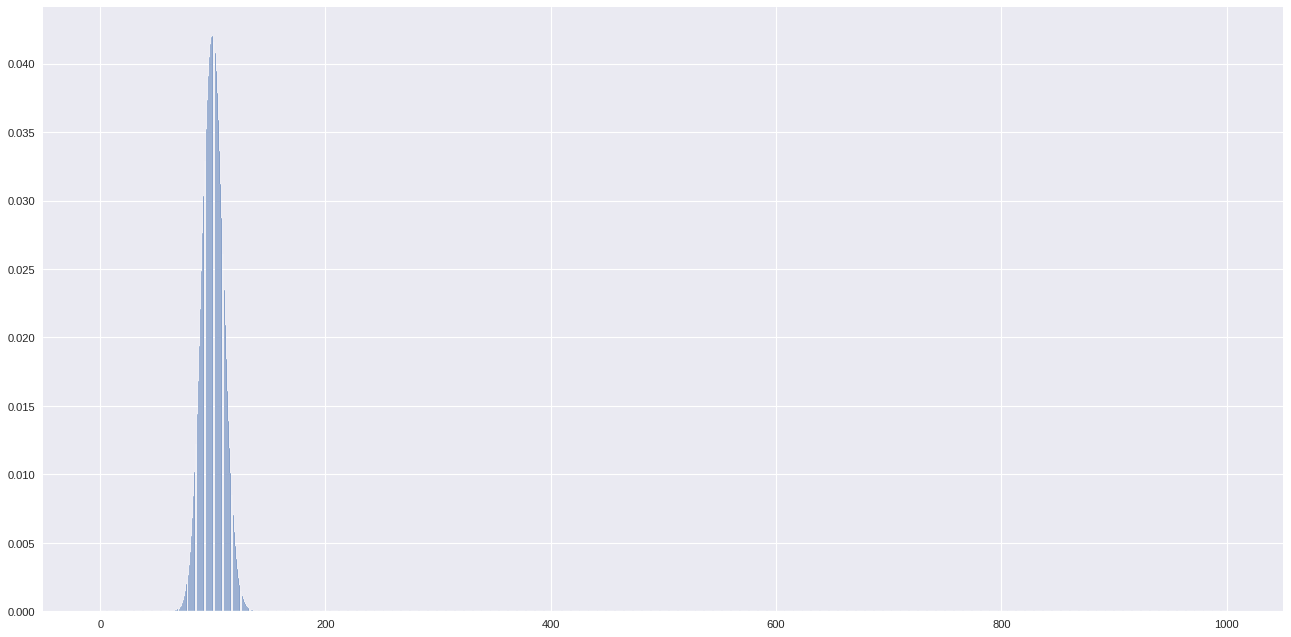

In [64]:
#from matplotlib import pyplot as plt
from scipy.stats import binom

plt.style.use("seaborn")
#plt.style.use("darkgrid")

n = 1000 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    

plt.figure(figsize=(20,10), dpi = 80)    
plt.bar(range(0, n + 1), distr)

plt.show();

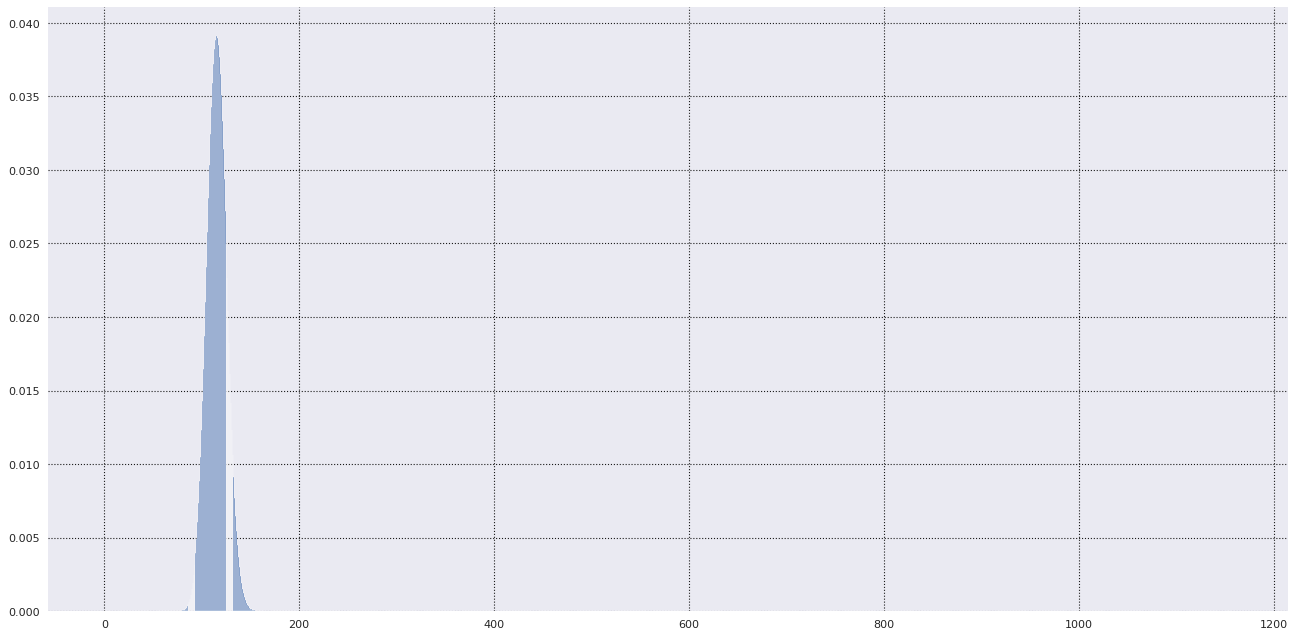

In [65]:
#from matplotlib import pyplot as plt
#from scipy.stats import binom

plt.style.use("seaborn")
#sns.set(context="poster")
sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})
#%matplotlib inline

n = 1156 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    

plt.figure(figsize=(20,10), dpi = 80)    
plt.bar(range(0, n + 1), distr)
plt.show();

#### Вывод
- при 1000 промокодов, вероятность получить 100 подписчиков = 50%
- при 1156 промокодов, вероятность получить 100 подписчиков >= 95%


### 7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении.
Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. **С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**
- **Предлагаемое решение**:
    - Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Можно воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

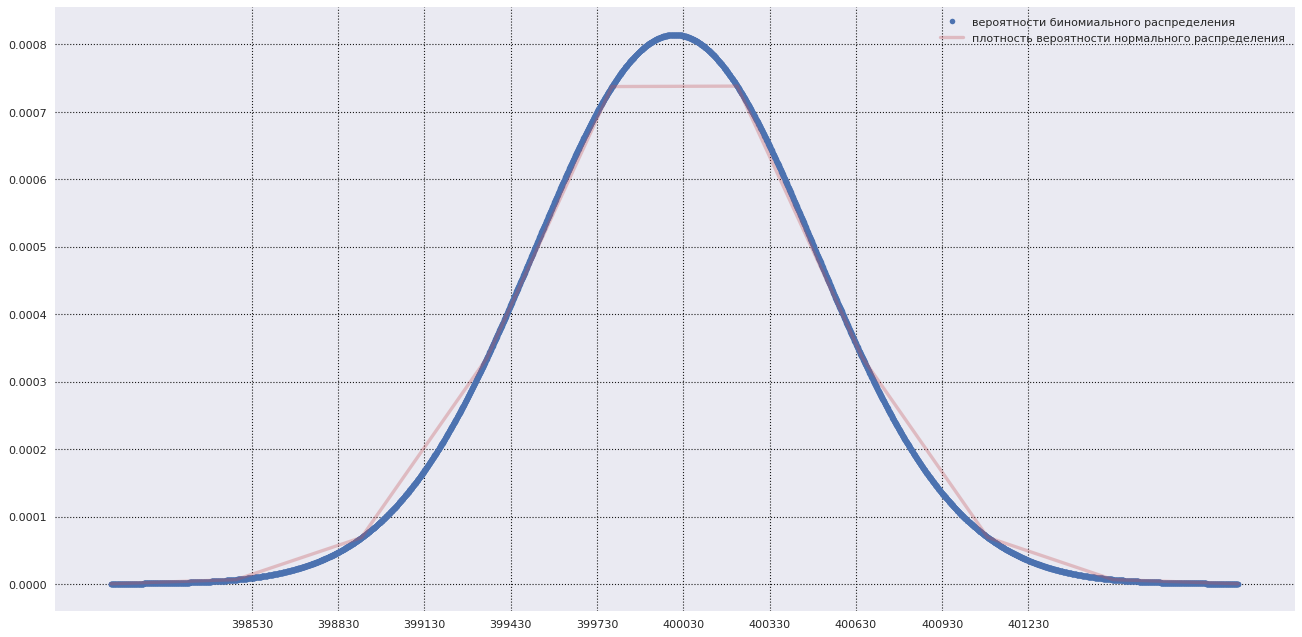

Условие выполняется


In [66]:
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
 
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

plt.figure(figsize=(20,10), dpi = 80)  
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
      label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 10)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 300))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

In [67]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слеава от 399500 (не более, это <=)
result = distr.cdf(399500)
print(result)

0.15371708296369768


#### Вывод:
Вероятность того, что уведомление откроют не более 399500 (т.е <= 399500) равна 15%, значит вероятность того, что более 399500 раз 100-15=85%


* **Аппроксимация нормальным распределением**: Используем нормальное распределение для аппроксимации биномиального, так как количество экспериментов (n) велико, и вероятность успеха (p) не очень мала или велика. Это соответствует правилу, что np и n(1-p) должны быть больше 10 для аппроксимации биномиального распределения нормальным.

* **График распределения**: График, показывает биномиальное распределение и его нормальную аппроксимацию. Как способ визуализировать распределение вероятностей.

* **Расчет вероятности**: Для расчета вероятности того, что уведомление откроют не более 399500 пользователей, использовал функцию распределения (CDF) нормального распределения.